# Bifurcation theory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

import phase_space_plotting as psp

## Bifurcations on the plane

### Saddle-node

In [2]:
def saddle_node_bifurcation(mu):
    xlim = (-2, 2)
    ylim = (-2, 2)

    def dx_dt(x, t):
        return [mu - x[0]**2, -x[1]]
    
    fig, ax = plt.subplots(figsize=(8, 4))
    if mu >=0:
        ax.vlines([-np.sqrt(mu), np.sqrt(mu)], *ylim, linestyle='--', linewidth=1, color='orange')

    psp.plot_field(dx_dt, xlim, ylim, scale=50, ax=ax)

In [3]:
slider = widgets.FloatSlider(value=-2, min=-2, max=2, step=0.01, description=r'$\mu$')

_ = widgets.interact(saddle_node_bifurcation, mu=slider)

interactive(children=(FloatSlider(value=-2.0, description='$\\mu$', max=2.0, min=-2.0, step=0.01), Output()), …

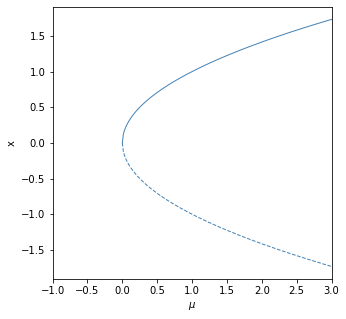

In [4]:
xlim = (-1, 3)
mu = np.linspace(0, 3, 200)
x1 = np.sqrt(mu)
x2 = -np.sqrt(mu)

plt.figure(figsize=(5, 5))
plt.xlim(xlim)
plt.plot(mu, x1, color='steelblue', linewidth=1)
plt.plot(mu, x2, color='steelblue', linewidth=1, linestyle='--')
plt.xlabel(r'$\mu$')
plt.ylabel('x')
plt.show()

### Transcritical bifurcation

In [5]:
def transcritical_bifurcation(mu):
    xlim = (-2, 2)
    ylim = (-2, 2)

    def dx_dt(x, t):
        return [mu*x[0] - x[0]**2, -x[1]]
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.vlines([mu, 0], *ylim, linestyle='--', linewidth=1, color='orange')

    psp.plot_field(dx_dt, xlim, ylim, scale=50, ax=ax)

In [6]:
slider = widgets.FloatSlider(value=-2, min=-2, max=2, step=0.01, description=r'$\mu$')

_ = widgets.interact(transcritical_bifurcation, mu=slider)

interactive(children=(FloatSlider(value=-2.0, description='$\\mu$', max=2.0, min=-2.0, step=0.01), Output()), …

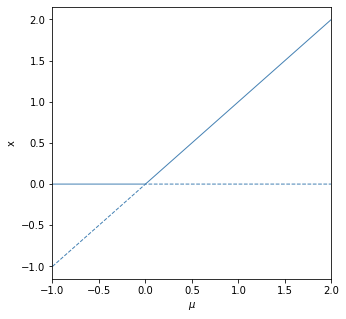

In [7]:
xlim = (-1, 2)
mu = np.linspace(-1, 2, 200)
x1 = np.where(mu < 0, 0, mu)
x2 = np.where(mu >= 0, 0, mu)

plt.figure(figsize=(5, 5))
plt.xlim(xlim)
plt.plot(mu, x1, color='steelblue', linewidth=1)
plt.plot(mu, x2, color='steelblue', linewidth=1, linestyle='--')
plt.xlabel(r'$\mu$')
plt.ylabel('x')
plt.show()

### Pitchfork bifurcation

In [8]:
def pitchfork_bifurcation(mu):
    xlim = (-2, 2)
    ylim = (-2, 2)

    def dx_dt(x, t):
        return [mu*x[0] - x[0]**3, -x[1]]
    
    fig, ax = plt.subplots(figsize=(8, 4))
    
    ax.vlines([0], *ylim, linestyle='--', linewidth=1, color='orange')
    if mu >=0:
        ax.vlines([-np.sqrt(mu), np.sqrt(mu)], *ylim, linestyle='--', linewidth=1, color='orange')

    psp.plot_field(dx_dt, xlim, ylim, scale=50, ax=ax)

In [9]:
slider = widgets.FloatSlider(value=-2, min=-2, max=2, step=0.01, description=r'$\mu$')

_ = widgets.interact(pitchfork_bifurcation, mu=slider)

interactive(children=(FloatSlider(value=-2.0, description='$\\mu$', max=2.0, min=-2.0, step=0.01), Output()), …

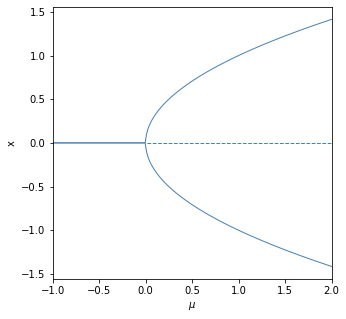

In [10]:
xlim = (-1, 2)
mu = np.linspace(-1, 2, 200)
x1 = np.where(mu < 0, 0, np.sqrt(np.abs(mu)))
x2 = np.where(mu > 0, -np.sqrt(np.abs(mu)), 0)
x3 = np.zeros_like(mu[mu>0])

plt.figure(figsize=(5, 5))
plt.xlim(xlim)
plt.plot(mu, x1, color='steelblue', linewidth=1)
plt.plot(mu, x2, color='steelblue', linewidth=1)
plt.plot(mu[mu>0], x3, color='steelblue', linewidth=1, linestyle='--')
plt.xlabel(r'$\mu$')
plt.ylabel('x')
plt.show()

### Hopf bifurcation

In [32]:
def hopf_bifurcation(mu):
    xlim = (0, 2*np.pi)
    ylim = (0, 2)

    def dx_dt(x, t):
        return [-1, x[1]*(mu - x[1]**2)]

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='polar')
    psp.plot_traj([np.pi / 2, 1], dx_dt, fw=20, bw=0.1, n_time_samples=200, ax=ax)
    psp.plot_traj([-np.pi / 2, 0.5], dx_dt, fw=20, bw=0.3, n_time_samples=200, ax=ax)

    psp.plot_field(dx_dt, xlim, ylim, scale=200, ax=ax, polar=True, density=30j)

    ax.set_xlim(xlim)
    ax.set_ylim(np.array(ylim) * 1.1)

    plt.show()
    
slider = widgets.FloatSlider(value=-2, min=-2, max=2, step=0.01, description=r'$\mu$')

_ = widgets.interact(hopf_bifurcation, mu=slider)

interactive(children=(FloatSlider(value=-2.0, description='$\\mu$', max=2.0, min=-2.0, step=0.01), Output()), …